# Support Vector Machines
Support Vector Machines (SVM) is a supervised machine learning algorithm used for classification and regression:
- **classification**: by finding the optimal hyperplane that best separates different classes. SVM aims to maximize the margin between classes

#### **Scaling in SVM**:

- SVMs are sensitive to the feature scales. So, we gonna use `StandardScaler()` from `sklearn.preprocessing` as the features phenomena belonge to normal distribution.

<img src=https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0502.png>

In [1]:
import seaborn as sns
import matplotlib.pyplot  as plt
import numpy as np 
import pandas as pd

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

In [2]:
iris = load_iris(as_frame = True)
X = iris['data'][['sepal length (cm)', 'sepal width (cm)']]
y = (iris['target'] == 2) # we need binary classification not multiclass

In [3]:
X.describe()

,sepal length (cm),sepal width (cm)
count,150.000000,150.000000
mean,5.843333,3.057333
std,0.828066,0.435866
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


> **No outliers here, I'll add a point as an outlier to check the effect of soft and hard margin**

In [4]:
outlier = {
    'sepal length (cm)': [8.0, 7.0, 7.5],
    'sepal width (cm)': [3.0, 4.0, 3.5],
}
X_with_outlier = pd.concat([X, pd.DataFrame(outlier)], axis=0, ignore_index = True)
X_with_outlier

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
148,6.2,3.4
149,5.9,3.0
150,8.0,3.0
151,7.0,4.0


In [5]:
X_with_outlier.describe()

,sepal length (cm),sepal width (cm)
count,153.000000,153.000000
mean,5.875817,3.066013
std,0.853555,0.439671
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.400000
max,8.000000,4.400000


In [6]:
import pandas as pd 
y_with_outlier = y._append(pd.Series([False, False, False], index=[150, 151, 152]))
y_with_outlier = y_with_outlier.rename('target')

In [7]:
df_with_outliers = pd.concat([X_with_outlier, y_with_outlier], axis = 1)
df_with_outliers

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,False
1,4.9,3.0,False
2,4.7,3.2,False
3,4.6,3.1,False
4,5.0,3.6,False
...,...,...,...
148,6.2,3.4,True
149,5.9,3.0,True
150,8.0,3.0,False
151,7.0,4.0,False


## Linear SVM Classification
**1. Hard Margin Classification:**
strictly impose that all instances must be off the street and on the correct side.
    
    - only works if the data is linearly separable.
    - It is sensitive to outliers.

<img src="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0501.png" alt="Figure 2: SVC without Outlier">
<img src="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0503.png" alt="Figure 2: SVC with Outlier">

    
> Model in Figure.2 will probably not generalize as well. To avoid these issues, we will use **soft margin**. 

**2. Soft Margin Classification:**
Can find a good balance between **maximizing the margin**  and **limiting the margin violations** .
> **margin violations**: instances in the middle of the street or even on the wrong side.

#### **Control Margin:**
- `C`: regularization hyperparameter to cotrol margin size and margin volation.
- Reducing `C` makes the street larger, but it also leads to more margin violations. 
- If your SVM model is overfitting, you can try regularizing it by reducing `C`
    
<img src="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0504.png" alt="Large margin (left) versus fewer margin violations (right)">
 

In [8]:
svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state=42))
svm_clf.fit(X_with_outlier[5:-5], y_with_outlier[5:-5])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [9]:
# Extract the coefficients and intercept
coef = svm_clf.named_steps['linearsvc'].coef_[0]
intercept = svm_clf.named_steps['linearsvc'].intercept_

# Margin magnitude
margin = 1 / np.sqrt(np.sum(coef ** 2))
margin

1.386518887020248

In [10]:
# # Calculate the slope and intercept of the decision boundary
# slope = -coef[0] / coef[1]
# intercept = -intercept / coef[1]

# x_vals = np.linspace(df_with_outliers['sepal length (cm)'].min(), df_with_outliers['sepal length (cm)'].max(), 100)
# y_vals = slope * x_vals + intercept
# decision_boundary_points = np.array(list(zip(x_vals, y_vals)))

# w_unit_vector = coef / np.sqrt(np.sum(coef ** 2))
# points_of_line_above = decision_boundary_points + w_unit_vector * margin
# points_of_line_below = decision_boundary_points - w_unit_vector * margin
# # Plot decision boundary
# plt.plot(x_vals, y_vals,'k-')

# # Blue margin line above
# plt.plot(points_of_line_above[:, 0], 
#          points_of_line_above[:, 1], 
#          'b--', 
#          linewidth=2)
# # Green margin line below
# plt.plot(points_of_line_below[:, 0], 
#          points_of_line_below[:, 1], 
#          'g--',
#          linewidth=2)

# # Plot the data points of the true target value
# x_axis = df_with_outliers[df_with_outliers['target'] == True]['sepal length (cm)']
# y_axis = df_with_outliers[df_with_outliers['target'] == True]['sepal width (cm)']
# sns.scatterplot(x=x_axis, y=y_axis, marker='s', color='blue', s=15)

# # Plot the data points of the false target value
# x_axis = df_with_outliers[df_with_outliers['target'] == False]['sepal length (cm)']
# y_axis = df_with_outliers[df_with_outliers['target'] == False]['sepal width (cm)']
# sns.scatterplot(x=x_axis, y=y_axis, marker='s', color='red', s=15)

# # Plot the data points of the outliers 
# x_axis = df_with_outliers.iloc[-3:,0]
# y_axis = df_with_outliers.iloc[-3:,1]
# sns.scatterplot(x=x_axis, y=y_axis, marker='*', color='y', s=150)

#### **Error Analysis**

In [11]:
y_pred = svm_clf.predict(X)
y = y.astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

Confusion Matrix:
[[86 14]
 [16 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       100
           1       0.71      0.68      0.69        50

    accuracy                           0.80       150
   macro avg       0.78      0.77      0.77       150
weighted avg       0.80      0.80      0.80       150



#### **Testing**

In [12]:
X_test = X_with_outlier[:5]
print('Acual y: ', y_with_outlier[:5].values)
print('Predicted y: ', svm_clf.predict(X_test))
print('distance between instance and decision boundary: ', svm_clf.decision_function(X_test))

Acual y:  [False False False False False]
Predicted y:  [False False False False False]
distance between instance and decision boundary:  [-1.16265842 -1.23804987 -1.45145052 -1.51871965 -1.26935875]


---
## **Nonlinear SVM Classification**
SVM with kernel functions to handle data that is not linearly separable. Commonly used kernel functions include:  
- Polynomial Kernel.
- Radial Basis Function (RBF) Kernel.
- Sigmoid Kernel.
- Tanh Kernel.

#### **Coding steps:**

- A nonlinearly separable dataset is generated using `make_moons()`.
- The dataset is splited into into training and testing sets.
We create an SVM classifier with RBF kernel using SVC from scikit-learn.
We train the SVM classifier on the training data.
We make predictions on the test data.
We calculate the accuracy of the classifier.

In [13]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=500, noise=0.15, random_state=42)

In [14]:
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

<Axes: xlabel='Feature 1', ylabel='Feature 2'>

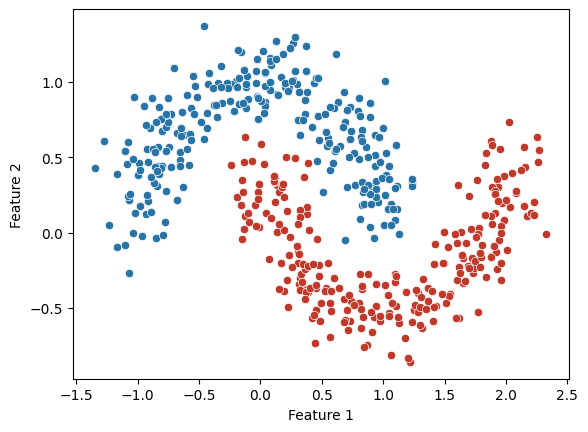

In [15]:
sns.scatterplot(x=df[df['Target']==0]['Feature 1'], y=df[df['Target']==0]['Feature 2'], color='#2874A6')
sns.scatterplot(x=df[df['Target']==1]['Feature 1'], y=df[df['Target']==1]['Feature 2'], color='#C0392B')

### **1. Linear SVC**

In [16]:
from sklearn.svm import SVC

ploy_svc = make_pipeline(
            StandardScaler(),    
            SVC(kernel='linear', C=10, max_iter=10_000, random_state=42))

ploy_svc.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=10, kernel='linear', max_iter=10000, random_state=42))])

In [17]:
from sklearn.inspection import DecisionBoundaryDisplay

def plot_training_data_with_decision_boundary(kernel, clf, X, y):
    # Settings for plotting
    _, ax = plt.subplots(figsize=(9, 6))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
        cmap='coolwarm',  # Change colormap to include purple
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["darkblue", "k", "brown"],  # Change colors here
        linestyles=["--", "-", "--"],
    )

    # Plot bigger circles around samples that serve as support vectors
    scatter = ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=50,
        facecolors="none",
        edgecolors="k",
    )
    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm', edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    ax.set_title(f"Decision boundaries of {kernel} kernel in SVC")

    _ = plt.show()

/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


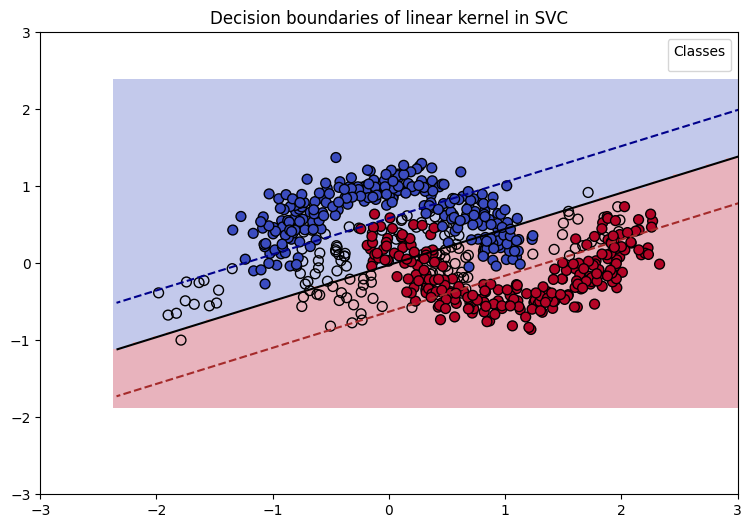

In [18]:
plot_training_data_with_decision_boundary("linear", ploy_svc.named_steps['svc'], X, y)

#### **Error Analysis**

In [19]:
y_pred = ploy_svc.predict(X)
y = y.astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

Confusion Matrix:
[[216  34]
 [ 33 217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       250
           1       0.86      0.87      0.87       250

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



### **2. Polynomial Kernel**
- Maps the input data into higher-dimensional feature space using polynomial functions.
- Can capture non-linear decision boundaries.
- Controlled by a parameter **𝑑** (degree) that determines the degree of the polynomial.

In [20]:
# ploy_svc = make_pipeline(
#             PolynomialFeatures(degree=3),
#             StandardScaler(),    
#             LinearSVC(C=10, max_iter=10_000, random_state=42))

ploy_svc = make_pipeline(
            StandardScaler(),    
            SVC(kernel="poly", degree=3, coef0=3, C=10))

ploy_svc.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, coef0=3, kernel='poly'))])

/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


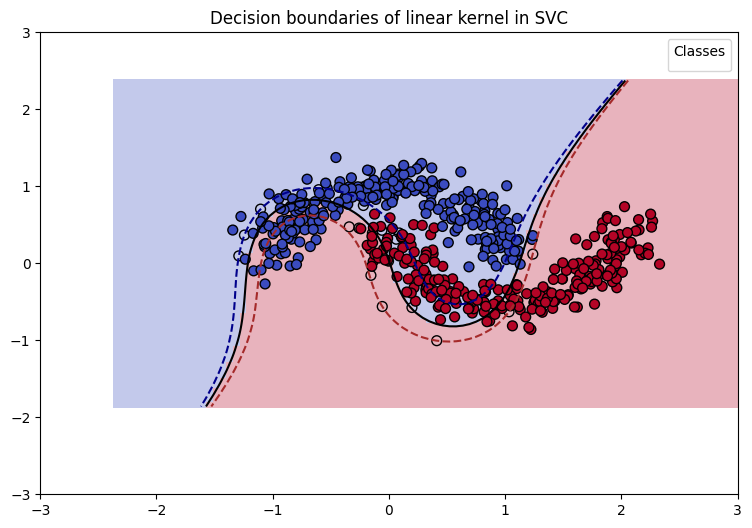

In [21]:
plot_training_data_with_decision_boundary("linear", ploy_svc.named_steps['svc'], X, y)

#### **Error Analysis**

In [22]:
y_pred = ploy_svc.predict(X)
y = y.astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

Confusion Matrix:
[[249   1]
 [  0 250]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



#### **Increase the polynomial degree**

In [23]:
ploy_svc = make_pipeline(
            StandardScaler(),    
            SVC(kernel="poly", degree=10, coef0=5, C=10))

ploy_svc.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, coef0=5, degree=10, kernel='poly'))])

/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


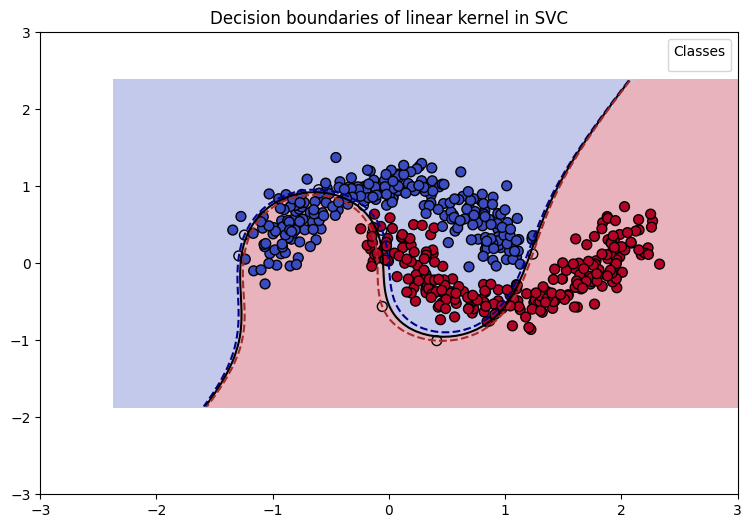

In [24]:
plot_training_data_with_decision_boundary("linear", ploy_svc.named_steps['svc'], X, y)

### **Gaussian RBF Kernel**

<img src="https://i.stack.imgur.com/MYSyn.jpg" width=300>
<img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgutMLmdbNfk3dXHijIX5-3y66wi5rOWx1OmDYqHaLAcAo2VhNcwrIbf2qkDzkxmM2Bcwug6LnOoWpxTk9ilWNmIprvaAota4RIc51RigVxPApJc0g9MvbvuEASYFml0NGDgx_GafJ2qvwCnL48hWacGztf5AaCh8AWdqisf40Y36T83e2NKOSo46uleA/s985/RBF%20gamma%20parameter.png" width=400>

- Highly flexible and can capture complex, non-linear decision boundaries.
- Controlled by a parameter **𝛾** (gamma) that determines the width of the kernel.
- Computes the similarity between data points based on the Gaussian (radial basis) function.
- The larger the euclidean distance between two points the closer the kernel function is to zero.
- This means that two points far away are more likely to be dissimilar.


In [25]:
rbf_kernel_svc = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=25, C=0.001))
rbf_kernel_svc.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=25))])

/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


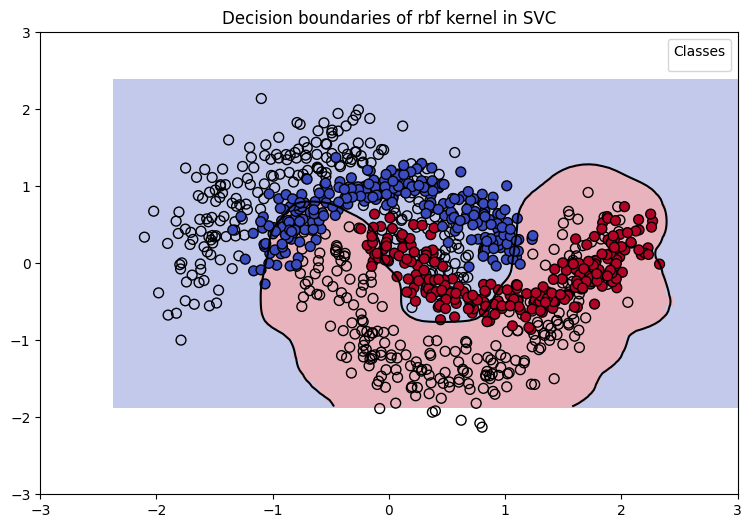

In [26]:
plot_training_data_with_decision_boundary("rbf", rbf_kernel_svc.named_steps['svc'], X, y)

## Resources
- plotting: 
    - https://medium.com/geekculture/svm-classification-with-sklearn-svm-svc-how-to-plot-a-decision-boundary-with-margins-in-2d-space-7232cb3962c0
    - https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.htmlhttps://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
- SVM intuation: https://www.youtube.com/watch?v=efR1C6CvhmE&t=0s
- SVM Kernels: https://www.youtube.com/watch?v=Toet3EiSFcM&t=0s , https://www.youtube.com/watch?v=Qc5IyLW_hns&t=96s
